# Image Classification
In this project, you'll classify images from the [CIFAR-10 dataset](https://www.cs.toronto.edu/~kriz/cifar.html).  The dataset consists of airplanes, dogs, cats, and other objects. You'll preprocess the images, then train a convolutional neural network on all the samples. The images need to be normalized and the labels need to be one-hot encoded.  You'll get to apply what you learned and build a convolutional, max pooling, dropout, and fully connected layers.  At the end, you'll get to see your neural network's predictions on the sample images.
## Get the Data
Run the following cell to download the [CIFAR-10 dataset for python](https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz).

In [1]:
"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
from urllib.request import urlretrieve
from os.path import isfile, isdir
from tqdm import tqdm
import problem_unittests as tests
import tarfile

cifar10_dataset_folder_path = 'cifar-10-batches-py'

class DLProgress(tqdm):
    last_block = 0

    def hook(self, block_num=1, block_size=1, total_size=None):
        self.total = total_size
        self.update((block_num - self.last_block) * block_size)
        self.last_block = block_num

if not isfile('cifar-10-python.tar.gz'):
    with DLProgress(unit='B', unit_scale=True, miniters=1, desc='CIFAR-10 Dataset') as pbar:
        urlretrieve(
            'https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz',
            'cifar-10-python.tar.gz',
            pbar.hook)

if not isdir(cifar10_dataset_folder_path):
    with tarfile.open('cifar-10-python.tar.gz') as tar:
        tar.extractall()
        tar.close()


tests.test_folder_path(cifar10_dataset_folder_path)

All files found!


## Explore the Data
The dataset is broken into batches to prevent your machine from running out of memory.  The CIFAR-10 dataset consists of 5 batches, named `data_batch_1`, `data_batch_2`, etc.. Each batch contains the labels and images that are one of the following:
* airplane
* automobile
* bird
* cat
* deer
* dog
* frog
* horse
* ship
* truck

Understanding a dataset is part of making predictions on the data.  Play around with the code cell below by changing the `batch_id` and `sample_id`. The `batch_id` is the id for a batch (1-5). The `sample_id` is the id for a image and label pair in the batch.

Ask yourself "What are all possible labels?", "What is the range of values for the image data?", "Are the labels in order or random?".  Answers to questions like these will help you preprocess the data and end up with better predictions.


Stats of batch 5:
Samples: 10000
Label Counts: {0: 1014, 1: 1014, 2: 952, 3: 1016, 4: 997, 5: 1025, 6: 980, 7: 977, 8: 1003, 9: 1022}
First 20 Labels: [1, 8, 5, 1, 5, 7, 4, 3, 8, 2, 7, 2, 0, 1, 5, 9, 6, 2, 0, 8]

Example of Image 3:
Image - Min Value: 0 Max Value: 252
Image - Shape: (32, 32, 3)
Label - Label Id: 1 Name: automobile


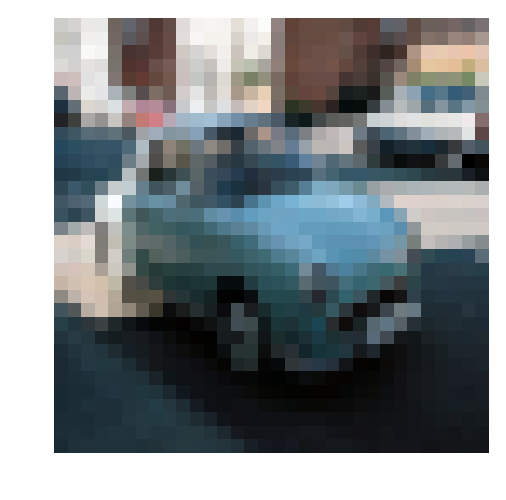

In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import helper
import numpy as np

# Explore the dataset
batch_id = 5
sample_id = 3
helper.display_stats(cifar10_dataset_folder_path, batch_id, sample_id)

Stats of batch 1:
- Samples: 10000
- Label Counts: {0: 1005, 1: 974, 2: 1032, 3: 1016, 4: 999, 5: 937, 6: 1030, 7: 1001, 8: 1025, 9: 981}
- First 20 Labels: [6, 9, 9, 4, 1, 1, 2, 7, 8, 3, 4, 7, 7, 2, 9, 9, 9, 3, 2, 6]

Stats of batch 2:
- Samples: 10000
- Label Counts: {0: 984, 1: 1007, 2: 1010, 3: 995, 4: 1010, 5: 988, 6: 1008, 7: 1026, 8: 987, 9: 985}
- First 20 Labels: [1, 6, 6, 8, 8, 3, 4, 6, 0, 6, 0, 3, 6, 6, 5, 4, 8, 3, 2, 6]

Stats of batch 3:
- Samples: 10000
- Label Counts: {0: 994, 1: 1042, 2: 965, 3: 997, 4: 990, 5: 1029, 6: 978, 7: 1015, 8: 961, 9: 1029}
- First 20 Labels: [8, 5, 0, 6, 9, 2, 8, 3, 6, 2, 7, 4, 6, 9, 0, 0, 7, 3, 7, 2]

Stats of batch 4:
- Samples: 10000
- Label Counts: {0: 1003, 1: 963, 2: 1041, 3: 976, 4: 1004, 5: 1021, 6: 1004, 7: 981, 8: 1024, 9: 983}
- First 20 Labels: [0, 6, 0, 2, 7, 2, 1, 2, 4, 1, 5, 6, 6, 3, 1, 3, 5, 5, 8, 1]

Stats of batch 5:
- Samples: 10000
- Label Counts: {0: 1014, 1: 1014, 2: 952, 3: 1016, 4: 997, 5: 1025, 6: 980, 7: 977, 8: 1003, 9: 1022}
- First 20 Labels: [1, 8, 5, 1, 5, 7, 4, 3, 8, 2, 7, 2, 0, 1, 5, 9, 6, 2, 0, 8]

| Batch ID | Samples | Label Counts | First 20 Labels |
|:--------:|:-------:|:------------:|:---------------:|
| 1 | 10000 | {0: 1005, 1: 974, 2: 1032, 3: 1016, 4: 999, 5: 937, 6: 1030, 7: 1001, 8: 1025, 9: 981} | [6, 9, 9, 4, 1, 1, 2, 7, 8, 3, 4, 7, 7, 2, 9, 9, 9, 3, 2, 6]|
| 2 | 10000 | {0: 984, 1: 1007, 2: 1010, 3: 995, 4: 1010, 5: 988, 6: 1008, 7: 1026, 8: 987, 9: 985} | [1, 6, 6, 8, 8, 3, 4, 6, 0, 6, 0, 3, 6, 6, 5, 4, 8, 3, 2, 6] |
| 3 | 10000 | {0: 994, 1: 1042, 2: 965, 3: 997, 4: 990, 5: 1029, 6: 978, 7: 1015, 8: 961, 9: 1029} | [8, 5, 0, 6, 9, 2, 8, 3, 6, 2, 7, 4, 6, 9, 0, 0, 7, 3, 7, 2] |
| 4 | 10000 | {0: 1003, 1: 963, 2: 1041, 3: 976, 4: 1004, 5: 1021, 6: 1004, 7: 981, 8: 1024, 9: 983} | [0, 6, 0, 2, 7, 2, 1, 2, 4, 1, 5, 6, 6, 3, 1, 3, 5, 5, 8, 1] |
| 5 | 10000 | {0: 1014, 1: 1014, 2: 952, 3: 1016, 4: 997, 5: 1025, 6: 980, 7: 977, 8: 1003, 9: 1022} | [1, 8, 5, 1, 5, 7, 4, 3, 8, 2, 7, 2, 0, 1, 5, 9, 6, 2, 0, 8] |

In [3]:
import importlib
importlib.reload(helper)
# just exploring how to read from batches.meta
helper._load_label_names_from_file(cifar10_dataset_folder_path)

{'label_names': ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'], 'num_cases_per_batch': 10000, 'num_vis': 3072}


['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

## Implement Preprocess Functions
### Normalize
In the cell below, implement the `normalize` function to take in image data, `x`, and return it as a normalized Numpy array. The values should be in the range of 0 to 1, inclusive.  The return object should be the same shape as `x`.

In [4]:
def normalize(x):
    """
    Normalize a list of sample image data in the range of 0 to 1
    : x: List of image data.  The image shape is (32, 32, 3)
    : return: Numpy array of normalize data
    """
    # TODO: Implement Function
    val_min = 0
    val_max = 255
    # data = (x - val_min) / (val_max - val_min)
    # since we know val_min is always 0, remove some operations for speed 
    data = x / val_max
    return data


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_normalize(normalize)

Tests Passed


### One-hot encode
Just like the previous code cell, you'll be implementing a function for preprocessing.  This time, you'll implement the `one_hot_encode` function. The input, `x`, are a list of labels.  Implement the function to return the list of labels as One-Hot encoded Numpy array.  The possible values for labels are 0 to 9. The one-hot encoding function should return the same encoding for each value between each call to `one_hot_encode`.  Make sure to save the map of encodings outside the function.

Hint: Don't reinvent the wheel.

In [5]:
from sklearn.preprocessing import LabelBinarizer
labels_lb = LabelBinarizer()
possible_labels = range(10)
labels_lb.fit(possible_labels)

def one_hot_encode(x):
    """
    One hot encode a list of sample labels. Return a one-hot encoded vector for each label.
    : x: List of sample Labels
    : return: Numpy array of one-hot encoded labels
    """
    # alternate using np.eye
    return np.eye(10)[x]
    # TODO: Implement Function
    enc_labels = labels_lb.transform(x)
    return enc_labels


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_one_hot_encode(one_hot_encode)

Tests Passed


### Randomize Data
As you saw from exploring the data above, the order of the samples are randomized.  It doesn't hurt to randomize it again, but you don't need to for this dataset.

## Preprocess all the data and save it
Running the code cell below will preprocess all the CIFAR-10 data and save it to file. The code below also uses 10% of the training data for validation.

In [6]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
# Preprocess Training, Validation, and Testing Data
helper.preprocess_and_save_data(cifar10_dataset_folder_path, normalize, one_hot_encode)

# Check Point
This is your first checkpoint.  If you ever decide to come back to this notebook or have to restart the notebook, you can start from here.  The preprocessed data has been saved to disk.

In [1]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import pickle
import problem_unittests as tests
import helper

# Load the Preprocessed Validation data
valid_features, valid_labels = pickle.load(open('preprocess_validation.p', mode='rb'))

In [2]:
valid_features.shape

(5000, 32, 32, 3)

In [3]:
valid_labels.shape

(5000, 10)

## Build the network
For the neural network, you'll build each layer into a function.  Most of the code you've seen has been outside of functions. To test your code more thoroughly, we require that you put each layer in a function.  This allows us to give you better feedback and test for simple mistakes using our unittests before you submit your project.

>**Note:** If you're finding it hard to dedicate enough time for this course each week, we've provided a small shortcut to this part of the project. In the next couple of problems, you'll have the option to use classes from the [TensorFlow Layers](https://www.tensorflow.org/api_docs/python/tf/layers) or [TensorFlow Layers (contrib)](https://www.tensorflow.org/api_guides/python/contrib.layers) packages to build each layer, except the layers you build in the "Convolutional and Max Pooling Layer" section.  TF Layers is similar to Keras's and TFLearn's abstraction to layers, so it's easy to pickup.

>However, if you would like to get the most out of this course, try to solve all the problems _without_ using anything from the TF Layers packages. You **can** still use classes from other packages that happen to have the same name as ones you find in TF Layers! For example, instead of using the TF Layers version of the `conv2d` class, [tf.layers.conv2d](https://www.tensorflow.org/api_docs/python/tf/layers/conv2d), you would want to use the TF Neural Network version of `conv2d`, [tf.nn.conv2d](https://www.tensorflow.org/api_docs/python/tf/nn/conv2d). 

Let's begin!

### Input
The neural network needs to read the image data, one-hot encoded labels, and dropout keep probability. Implement the following functions
* Implement `neural_net_image_input`
 * Return a [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder)
 * Set the shape using `image_shape` with batch size set to `None`.
 * Name the TensorFlow placeholder "x" using the TensorFlow `name` parameter in the [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder).
* Implement `neural_net_label_input`
 * Return a [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder)
 * Set the shape using `n_classes` with batch size set to `None`.
 * Name the TensorFlow placeholder "y" using the TensorFlow `name` parameter in the [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder).
* Implement `neural_net_keep_prob_input`
 * Return a [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder) for dropout keep probability.
 * Name the TensorFlow placeholder "keep_prob" using the TensorFlow `name` parameter in the [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder).

These names will be used at the end of the project to load your saved model.

Note: `None` for shapes in TensorFlow allow for a dynamic size.

In [4]:
import tensorflow as tf

def neural_net_image_input(image_shape):
    """
    Return a Tensor for a batch of image input
    : image_shape: Shape of the images
    : return: Tensor for image input.
    """
    # TODO: Implement Function
    return tf.placeholder(tf.float32, [None, *image_shape], name='x')


def neural_net_label_input(n_classes):
    """
    Return a Tensor for a batch of label input
    : n_classes: Number of classes
    : return: Tensor for label input.
    """
    # TODO: Implement Function
    return tf.placeholder(tf.float32, [None, n_classes], name='y')


def neural_net_keep_prob_input():
    """
    Return a Tensor for keep probability
    : return: Tensor for keep probability.
    """
    # TODO: Implement Function
    return tf.placeholder(tf.float32, name='keep_prob')


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tf.reset_default_graph()
tests.test_nn_image_inputs(neural_net_image_input)
tests.test_nn_label_inputs(neural_net_label_input)
tests.test_nn_keep_prob_inputs(neural_net_keep_prob_input)

Image Input Tests Passed.
Label Input Tests Passed.
Keep Prob Tests Passed.


### Convolution and Max Pooling Layer
Convolution layers have a lot of success with images. For this code cell, you should implement the function `conv2d_maxpool` to apply convolution then max pooling:
* Create the weight and bias using `conv_ksize`, `conv_num_outputs` and the shape of `x_tensor`.
* Apply a convolution to `x_tensor` using weight and `conv_strides`.
 * We recommend you use same padding, but you're welcome to use any padding.
* Add bias
* Add a nonlinear activation to the convolution.
* Apply Max Pooling using `pool_ksize` and `pool_strides`.
 * We recommend you use same padding, but you're welcome to use any padding.

**Note:** You **can't** use [TensorFlow Layers](https://www.tensorflow.org/api_docs/python/tf/layers) or [TensorFlow Layers (contrib)](https://www.tensorflow.org/api_guides/python/contrib.layers) for **this** layer, but you can still use TensorFlow's [Neural Network](https://www.tensorflow.org/api_docs/python/tf/nn) package. You may still use the shortcut option for all the **other** layers.

In [5]:
def conv2d_maxpool(x_tensor, conv_num_outputs, conv_ksize, conv_strides, pool_ksize, pool_strides):
    """
    Apply convolution then max pooling to x_tensor
    :param x_tensor: TensorFlow Tensor
    :param conv_num_outputs: Number of outputs for the convolutional layer
    :param conv_ksize: kernel size 2-D Tuple for the convolutional layer
    :param conv_strides: Stride 2-D Tuple for convolution
    :param pool_ksize: kernel size 2-D Tuple for pool
    :param pool_strides: Stride 2-D Tuple for pool
    : return: A tensor that represents convolution and max pooling of x_tensor
    """
    # TODO: Implement Function
    height, width = conv_ksize
    input_depth = x_tensor.get_shape().as_list()[-1]
    output_depth = conv_num_outputs
    filter_weights = tf.Variable(tf.truncated_normal([height, width, input_depth, output_depth], stddev=0.1), name='conv_weight')
    #filter_bias = tf.Variable(tf.zeros([output_depth]), name='conv_bias')
    filter_bias = tf.Variable(tf.constant(0.01, shape=[output_depth]), name='conv_bias')
    padding = 'SAME'
    conv = tf.nn.conv2d(x_tensor, filter=filter_weights, strides=[1, *conv_strides, 1], padding=padding) 
    conv = tf.nn.bias_add(conv, filter_bias)
    conv = tf.nn.relu(conv)
    conv = tf.nn.max_pool(conv, ksize=[1, *pool_ksize, 1], strides=[1, *pool_strides ,1], padding=padding)
    return conv


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_con_pool(conv2d_maxpool)

Tests Passed


In [6]:
# checking conv output variable
test_x = tf.placeholder(tf.float32, [None, 32, 32, 5])
test_num_outputs = 10
test_con_k = (2, 2)
test_con_s = (1, 1)
test_pool_k = (2, 2)
test_pool_s = (2, 2)

conv2d_maxpool_out = conv2d_maxpool(test_x, test_num_outputs, test_con_k, test_con_s, test_pool_k, test_pool_s)
conv2d_maxpool_out.get_shape().as_list()[1:]

[16, 16, 10]

### Flatten Layer
Implement the `flatten` function to change the dimension of `x_tensor` from a 4-D tensor to a 2-D tensor.  The output should be the shape (*Batch Size*, *Flattened Image Size*). Shortcut option: you can use classes from the [TensorFlow Layers](https://www.tensorflow.org/api_docs/python/tf/layers) or [TensorFlow Layers (contrib)](https://www.tensorflow.org/api_guides/python/contrib.layers) packages for this layer. For more of a challenge, only use other TensorFlow packages.

In [7]:
import numpy as np

def get_flattened_size(tensor):
    # this discards the first dimension which is batch size, giving [width,height,channel]
    size = tensor.get_shape().as_list()[1:]
    # then get product of the size = w*h*c
    flat_size = np.prod(size)
    return flat_size

def flatten(x_tensor):
    """
    Flatten x_tensor to (Batch Size, Flattened Image Size)
    : x_tensor: A tensor of size (Batch Size, ...), where ... are the image dimensions.
    : return: A tensor of size (Batch Size, Flattened Image Size).
    """
    # easier method using built in function
    return tf.contrib.layers.flatten(x_tensor)
    # TODO: Implement Function
    flattened_image_size = get_flattened_size(x_tensor)
    return tf.reshape(x_tensor, shape=[-1, flattened_image_size])


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_flatten(flatten)

Tests Passed


### Fully-Connected Layer
Implement the `fully_conn` function to apply a fully connected layer to `x_tensor` with the shape (*Batch Size*, *num_outputs*). Shortcut option: you can use classes from the [TensorFlow Layers](https://www.tensorflow.org/api_docs/python/tf/layers) or [TensorFlow Layers (contrib)](https://www.tensorflow.org/api_guides/python/contrib.layers) packages for this layer. For more of a challenge, only use other TensorFlow packages.

In [8]:
def fully_conn(x_tensor, num_outputs):
    """
    Apply a fully connected layer to x_tensor using weight and bias
    : x_tensor: A 2-D tensor where the first dimension is batch size.
    : num_outputs: The number of output that the new tensor should be.
    : return: A 2-D tensor where the second dimension is num_outputs.
    """
    # TODO: Implement Function
    # flat_size = get_flattened_size(x_tensor) # alternatively can just use .get_shape().as_list()[-1] since input is 2-D
    flat_size = x_tensor.get_shape().as_list()[-1]
    fc_weights = tf.Variable(tf.truncated_normal([flat_size, num_outputs], stddev=0.1), name='fc_weights')
    #fc_bias = tf.Variable(tf.zeros([num_outputs]), name='fc_bias')
    fc_bias = tf.Variable(tf.constant(0.01, shape=[num_outputs]), name='fc_bias')
    x = tf.add(tf.matmul(x_tensor, fc_weights), fc_bias)
    x = tf.nn.relu(x)
    return x

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_fully_conn(fully_conn)

Tests Passed


### Output Layer
Implement the `output` function to apply a fully connected layer to `x_tensor` with the shape (*Batch Size*, *num_outputs*). Shortcut option: you can use classes from the [TensorFlow Layers](https://www.tensorflow.org/api_docs/python/tf/layers) or [TensorFlow Layers (contrib)](https://www.tensorflow.org/api_guides/python/contrib.layers) packages for this layer. For more of a challenge, only use other TensorFlow packages.

**Note:** Activation, softmax, or cross entropy should **not** be applied to this.

In [9]:
def output(x_tensor, num_outputs):
    """
    Apply a output layer to x_tensor using weight and bias
    : x_tensor: A 2-D tensor where the first dimension is batch size.
    : num_outputs: The number of output that the new tensor should be.
    : return: A 2-D tensor where the second dimension is num_outputs.
    """
    # TODO: Implement Function
    # flat_size = get_flattened_size(x_tensor)
    flat_size = x_tensor.get_shape().as_list()[-1]
    out_weights = tf.Variable(tf.truncated_normal([flat_size, num_outputs], stddev=0.1), name='out_weights')
    #out_bias = tf.Variable(tf.zeros([num_outputs]), name='out_bias')
    out_bias = tf.Variable(tf.constant(0.01, shape=[num_outputs]), name='out_bias')
    return tf.add(tf.matmul(x_tensor, out_weights), out_bias)


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_output(output)

Tests Passed


### Create Convolutional Model
Implement the function `conv_net` to create a convolutional neural network model. The function takes in a batch of images, `x`, and outputs logits.  Use the layers you created above to create this model:

* Apply 1, 2, or 3 Convolution and Max Pool layers
* Apply a Flatten Layer
* Apply 1, 2, or 3 Fully Connected Layers
* Apply an Output Layer
* Return the output
* Apply [TensorFlow's Dropout](https://www.tensorflow.org/api_docs/python/tf/nn/dropout) to one or more layers in the model using `keep_prob`. 

In [10]:
def conv_net(x, keep_prob):
    """
    Create a convolutional neural network model
    : x: Placeholder tensor that holds image data.
    : keep_prob: Placeholder tensor that hold dropout keep probability.
    : return: Tensor that represents logits
    """
    # TODO: Apply 1, 2, or 3 Convolution and Max Pool layers
    #    Play around with different number of outputs, kernel size and stride
    # Function Definition from Above:
    #    conv2d_maxpool(x_tensor, conv_num_outputs, conv_ksize, conv_strides, pool_ksize, pool_strides)
    ## Conv layer1 16*16*32
    x = conv2d_maxpool(x, conv_num_outputs=32, conv_ksize=(3,3), conv_strides=(1,1), pool_ksize=(2,2), pool_strides=(2,2))
    
    ## Dropout1
    x = tf.nn.dropout(x, keep_prob)
    
    ## Conv layer2 8*8*96
    x = conv2d_maxpool(x, conv_num_outputs=96, conv_ksize=(3,3), conv_strides=(1,1), pool_ksize=(2,2), pool_strides=(2,2))
    
    ## Dropout2
    x = tf.nn.dropout(x, keep_prob)
    
    ## Conv layer3 4*4*192
    x = conv2d_maxpool(x, conv_num_outputs=192, conv_ksize=(3,3), conv_strides=(1,1), pool_ksize=(2,2), pool_strides=(2,2))

    # TODO: Apply a Flatten Layer
    # Function Definition from Above:
    #   flatten(x_tensor)
    x = flatten(x)

    # TODO: Apply 1, 2, or 3 Fully Connected Layers
    #    Play around with different number of outputs
    # Function Definition from Above:
    #   fully_conn(x_tensor, num_outputs)
    
    ## FC layer1
    x = fully_conn(x, 1024)
    
    ## Dropout3
    x = tf.nn.dropout(x, keep_prob)
    
    ## FC layer2
    x = fully_conn(x, 512)
    
    ## Dropout4
    x = tf.nn.dropout(x, keep_prob)
    
     ## FC layer3
    x = fully_conn(x, 128)
    
    ## Dropout5   dropouts are very helpful in this case to reduce overfitting and giving reasonable validation accuracy
    x = tf.nn.dropout(x, keep_prob)
    
    # TODO: Apply an Output Layer
    #    Set this to the number of classes
    # Function Definition from Above:
    #   output(x_tensor, num_outputs)
    n_classes = 10
    x = output(x, n_classes)
    
    # TODO: return output
    return x


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""

##############################
## Build the Neural Network ##
##############################

# Remove previous weights, bias, inputs, etc..
tf.reset_default_graph()

# Inputs
x = neural_net_image_input((32, 32, 3))
y = neural_net_label_input(10)
keep_prob = neural_net_keep_prob_input()

# Model
logits = conv_net(x, keep_prob)

# Name logits Tensor, so that is can be loaded from disk after training
logits = tf.identity(logits, name='logits')

# Loss and Optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=y))
optimizer = tf.train.AdamOptimizer().minimize(cost)

# Accuracy
correct_pred = tf.equal(tf.argmax(logits, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32), name='accuracy')

tests.test_conv_net(conv_net)

Neural Network Built!


## Train the Neural Network
### Single Optimization
Implement the function `train_neural_network` to do a single optimization.  The optimization should use `optimizer` to optimize in `session` with a `feed_dict` of the following:
* `x` for image input
* `y` for labels
* `keep_prob` for keep probability for dropout

This function will be called for each batch, so `tf.global_variables_initializer()` has already been called.

Note: Nothing needs to be returned. This function is only optimizing the neural network.

In [11]:
def train_neural_network(session, optimizer, keep_probability, feature_batch, label_batch):
    """
    Optimize the session on a batch of images and labels
    : session: Current TensorFlow session
    : optimizer: TensorFlow optimizer function
    : keep_probability: keep probability
    : feature_batch: Batch of Numpy image data
    : label_batch: Batch of Numpy label data
    """
    # TODO: Implement Function
    session.run(optimizer, feed_dict={x: feature_batch, y: label_batch, keep_prob: keep_probability})


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_train_nn(train_neural_network)

Tests Passed


### Show Stats
Implement the function `print_stats` to print loss and validation accuracy.  Use the global variables `valid_features` and `valid_labels` to calculate validation accuracy.  Use a keep probability of `1.0` to calculate the loss and validation accuracy.

In [12]:
# not enough memory for full 5000 validation data, OOM when allocating tensor with shape[5000,32,32,32]
test_valid_size = 2000

def print_stats(session, feature_batch, label_batch, cost, accuracy):
    """
    Print information about loss and validation accuracy
    : session: Current TensorFlow session
    : feature_batch: Batch of Numpy image data
    : label_batch: Batch of Numpy label data
    : cost: TensorFlow cost function
    : accuracy: TensorFlow accuracy function
    """
    # TODO: Implement Function
    loss = session.run(cost, feed_dict={x: feature_batch, y: label_batch, keep_prob: 1.0})
    valid_acc = session.run(accuracy, feed_dict={x: valid_features[:test_valid_size], y: valid_labels[:test_valid_size], keep_prob: 1.0})
    print('Loss: {:>12.4f}   Validation Accuracy: {:>10.6f}'.format(loss, valid_acc))

### Hyperparameters
Tune the following parameters:
* Set `epochs` to the number of iterations until the network stops learning or start overfitting
* Set `batch_size` to the highest number that your machine has memory for.  Most people set them to common sizes of memory:
 * 64
 * 128
 * 256
 * ...
* Set `keep_probability` to the probability of keeping a node using dropout

In [13]:
# TODO: Tune Parameters
epochs = 50
batch_size = 128
keep_probability = 0.75

### Train on a Single CIFAR-10 Batch
Instead of training the neural network on all the CIFAR-10 batches of data, let's use a single batch. This should save time while you iterate on the model to get a better accuracy.  Once the final validation accuracy is 50% or greater, run the model on all the data in the next section.

In [14]:
from tqdm import tqdm

In [15]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
print('Checking the Training on a Single Batch...')
with tf.Session() as sess:
    # Initializing the variables
    sess.run(tf.global_variables_initializer())
    
    epochs_pbar = tqdm(range(epochs), desc='Training', unit='epoch')
    
    # Training cycle
    #for epoch in range(epochs):
    for epoch in epochs_pbar:
        batch_i = 1
        for batch_features, batch_labels in helper.load_preprocess_training_batch(batch_i, batch_size):
            train_neural_network(sess, optimizer, keep_probability, batch_features, batch_labels)
        print('Epoch {:>2}/{}, CIFAR-10 Batch {}:  '.format(epoch + 1, epochs, batch_i), end='')
        print_stats(sess, batch_features, batch_labels, cost, accuracy)

Checking the Training on a Single Batch...


Training:   0%|                                           | 0/50 [00:00<?, ?epoch/s]

Epoch  1/50, CIFAR-10 Batch 1:  Loss:       2.2237   Validation Accuracy:   0.213500


Training:   2%|▋                                  | 1/50 [00:06<05:24,  6.63s/epoch]

Epoch  2/50, CIFAR-10 Batch 1:  Loss:       2.1561   Validation Accuracy:   0.275000


Training:   4%|█▍                                 | 2/50 [00:10<04:40,  5.84s/epoch]

Epoch  3/50, CIFAR-10 Batch 1:  Loss:       2.0539   Validation Accuracy:   0.312000


Training:   6%|██                                 | 3/50 [00:14<04:09,  5.30s/epoch]

Epoch  4/50, CIFAR-10 Batch 1:  Loss:       1.9382   Validation Accuracy:   0.386000


Training:   8%|██▊                                | 4/50 [00:18<03:46,  4.92s/epoch]

Epoch  5/50, CIFAR-10 Batch 1:  Loss:       1.7609   Validation Accuracy:   0.420000


Training:  10%|███▌                               | 5/50 [00:22<03:28,  4.63s/epoch]

Epoch  6/50, CIFAR-10 Batch 1:  Loss:       1.6200   Validation Accuracy:   0.451500


Training:  12%|████▏                              | 6/50 [00:26<03:17,  4.48s/epoch]

Epoch  7/50, CIFAR-10 Batch 1:  Loss:       1.5342   Validation Accuracy:   0.480000


Training:  14%|████▉                              | 7/50 [00:30<03:07,  4.35s/epoch]

Epoch  8/50, CIFAR-10 Batch 1:  Loss:       1.3634   Validation Accuracy:   0.497000


Training:  16%|█████▌                             | 8/50 [00:34<02:59,  4.27s/epoch]

Epoch  9/50, CIFAR-10 Batch 1:  Loss:       1.2533   Validation Accuracy:   0.502000


Training:  18%|██████▎                            | 9/50 [00:38<02:51,  4.19s/epoch]

Epoch 10/50, CIFAR-10 Batch 1:  Loss:       1.1624   Validation Accuracy:   0.520000


Training:  20%|██████▊                           | 10/50 [00:46<03:29,  5.23s/epoch]

Epoch 11/50, CIFAR-10 Batch 1:  Loss:       0.9906   Validation Accuracy:   0.549500


Training:  22%|███████▍                          | 11/50 [00:50<03:11,  4.90s/epoch]

Epoch 12/50, CIFAR-10 Batch 1:  Loss:       0.9825   Validation Accuracy:   0.566500


Training:  24%|████████▏                         | 12/50 [00:57<03:29,  5.51s/epoch]

Epoch 13/50, CIFAR-10 Batch 1:  Loss:       0.9453   Validation Accuracy:   0.568500


Training:  26%|████████▊                         | 13/50 [01:03<03:32,  5.75s/epoch]

Epoch 14/50, CIFAR-10 Batch 1:  Loss:       0.7883   Validation Accuracy:   0.578500


Training:  28%|█████████▌                        | 14/50 [01:08<03:15,  5.42s/epoch]

Epoch 15/50, CIFAR-10 Batch 1:  Loss:       0.7471   Validation Accuracy:   0.588000


Training:  30%|██████████▏                       | 15/50 [01:15<03:23,  5.82s/epoch]

Epoch 16/50, CIFAR-10 Batch 1:  Loss:       0.6597   Validation Accuracy:   0.603000


Training:  32%|██████████▉                       | 16/50 [01:22<03:27,  6.10s/epoch]

Epoch 17/50, CIFAR-10 Batch 1:  Loss:       0.5770   Validation Accuracy:   0.599000


Training:  34%|███████████▌                      | 17/50 [01:30<03:42,  6.75s/epoch]

Epoch 18/50, CIFAR-10 Batch 1:  Loss:       0.5123   Validation Accuracy:   0.610500


Training:  36%|████████████▏                     | 18/50 [01:39<04:02,  7.57s/epoch]

Epoch 19/50, CIFAR-10 Batch 1:  Loss:       0.4529   Validation Accuracy:   0.618000


Training:  38%|████████████▉                     | 19/50 [01:47<03:53,  7.53s/epoch]

Epoch 20/50, CIFAR-10 Batch 1:  Loss:       0.3976   Validation Accuracy:   0.626000


Training:  40%|█████████████▌                    | 20/50 [01:55<03:51,  7.72s/epoch]

Epoch 21/50, CIFAR-10 Batch 1:  Loss:       0.3541   Validation Accuracy:   0.623500


Training:  42%|██████████████▎                   | 21/50 [01:59<03:11,  6.60s/epoch]

Epoch 22/50, CIFAR-10 Batch 1:  Loss:       0.2586   Validation Accuracy:   0.635000


Training:  44%|██████████████▉                   | 22/50 [02:04<02:52,  6.15s/epoch]

Epoch 23/50, CIFAR-10 Batch 1:  Loss:       0.2217   Validation Accuracy:   0.623500


Training:  46%|███████████████▋                  | 23/50 [02:08<02:29,  5.54s/epoch]

Epoch 24/50, CIFAR-10 Batch 1:  Loss:       0.1858   Validation Accuracy:   0.633000


Training:  48%|████████████████▎                 | 24/50 [02:12<02:12,  5.09s/epoch]

Epoch 25/50, CIFAR-10 Batch 1:  Loss:       0.1704   Validation Accuracy:   0.629000


Training:  50%|█████████████████                 | 25/50 [02:16<02:00,  4.81s/epoch]

Epoch 26/50, CIFAR-10 Batch 1:  Loss:       0.2360   Validation Accuracy:   0.615000


Training:  52%|█████████████████▋                | 26/50 [02:21<01:50,  4.61s/epoch]

Epoch 27/50, CIFAR-10 Batch 1:  Loss:       0.0880   Validation Accuracy:   0.626500


Training:  54%|██████████████████▎               | 27/50 [02:25<01:46,  4.63s/epoch]

Epoch 28/50, CIFAR-10 Batch 1:  Loss:       0.0704   Validation Accuracy:   0.620500


Training:  56%|███████████████████               | 28/50 [02:30<01:41,  4.60s/epoch]

Epoch 29/50, CIFAR-10 Batch 1:  Loss:       0.0977   Validation Accuracy:   0.627000


Training:  58%|███████████████████▋              | 29/50 [02:34<01:35,  4.54s/epoch]

Epoch 30/50, CIFAR-10 Batch 1:  Loss:       0.0292   Validation Accuracy:   0.627500


Training:  60%|████████████████████▍             | 30/50 [02:38<01:29,  4.47s/epoch]

Epoch 31/50, CIFAR-10 Batch 1:  Loss:       0.0438   Validation Accuracy:   0.631500


Training:  62%|█████████████████████             | 31/50 [02:44<01:30,  4.75s/epoch]

Epoch 32/50, CIFAR-10 Batch 1:  Loss:       0.0226   Validation Accuracy:   0.636500


Training:  64%|█████████████████████▊            | 32/50 [02:48<01:22,  4.58s/epoch]

Epoch 33/50, CIFAR-10 Batch 1:  Loss:       0.0282   Validation Accuracy:   0.624000


Training:  66%|██████████████████████▍           | 33/50 [02:52<01:16,  4.48s/epoch]

Epoch 34/50, CIFAR-10 Batch 1:  Loss:       0.0082   Validation Accuracy:   0.643000


Training:  68%|███████████████████████           | 34/50 [02:57<01:12,  4.53s/epoch]

Epoch 35/50, CIFAR-10 Batch 1:  Loss:       0.0069   Validation Accuracy:   0.648500


Training:  70%|███████████████████████▊          | 35/50 [03:02<01:08,  4.59s/epoch]

Epoch 36/50, CIFAR-10 Batch 1:  Loss:       0.0034   Validation Accuracy:   0.640000


Training:  72%|████████████████████████▍         | 36/50 [03:06<01:03,  4.56s/epoch]

Epoch 37/50, CIFAR-10 Batch 1:  Loss:       0.0020   Validation Accuracy:   0.637000


Training:  74%|█████████████████████████▏        | 37/50 [03:11<01:01,  4.77s/epoch]

Epoch 38/50, CIFAR-10 Batch 1:  Loss:       0.0042   Validation Accuracy:   0.638000


Training:  76%|█████████████████████████▊        | 38/50 [03:16<00:55,  4.66s/epoch]

Epoch 39/50, CIFAR-10 Batch 1:  Loss:       0.0027   Validation Accuracy:   0.637000


Training:  78%|██████████████████████████▌       | 39/50 [03:22<00:55,  5.09s/epoch]

Epoch 40/50, CIFAR-10 Batch 1:  Loss:       0.0023   Validation Accuracy:   0.623000


Training:  80%|███████████████████████████▏      | 40/50 [03:27<00:52,  5.22s/epoch]

Epoch 41/50, CIFAR-10 Batch 1:  Loss:       0.0018   Validation Accuracy:   0.630000


Training:  82%|███████████████████████████▉      | 41/50 [03:32<00:45,  5.04s/epoch]

Epoch 42/50, CIFAR-10 Batch 1:  Loss:       0.0029   Validation Accuracy:   0.625500


Training:  84%|████████████████████████████▌     | 42/50 [03:37<00:40,  5.00s/epoch]

Epoch 43/50, CIFAR-10 Batch 1:  Loss:       0.0020   Validation Accuracy:   0.615500


Training:  86%|█████████████████████████████▏    | 43/50 [03:41<00:34,  4.87s/epoch]

Epoch 44/50, CIFAR-10 Batch 1:  Loss:       0.0009   Validation Accuracy:   0.642000


Training:  88%|█████████████████████████████▉    | 44/50 [03:47<00:29,  4.98s/epoch]

Epoch 45/50, CIFAR-10 Batch 1:  Loss:       0.0011   Validation Accuracy:   0.624500


Training:  90%|██████████████████████████████▌   | 45/50 [03:51<00:23,  4.79s/epoch]

Epoch 46/50, CIFAR-10 Batch 1:  Loss:       0.0006   Validation Accuracy:   0.627000


Training:  92%|███████████████████████████████▎  | 46/50 [03:55<00:18,  4.63s/epoch]

Epoch 47/50, CIFAR-10 Batch 1:  Loss:       0.0010   Validation Accuracy:   0.627500


Training:  94%|███████████████████████████████▉  | 47/50 [04:00<00:13,  4.54s/epoch]

Epoch 48/50, CIFAR-10 Batch 1:  Loss:       0.0005   Validation Accuracy:   0.624000


Training:  96%|████████████████████████████████▋ | 48/50 [04:04<00:08,  4.43s/epoch]

Epoch 49/50, CIFAR-10 Batch 1:  Loss:       0.0002   Validation Accuracy:   0.628500


Training:  98%|█████████████████████████████████▎| 49/50 [04:08<00:04,  4.42s/epoch]

Epoch 50/50, CIFAR-10 Batch 1:  Loss:       0.0004   Validation Accuracy:   0.618500


Training: 100%|██████████████████████████████████| 50/50 [04:13<00:00,  4.61s/epoch]


### Fully Train the Model
Now that you got a good accuracy with a single CIFAR-10 batch, try it with all five batches.

In [16]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
save_model_path = './image_classification'

print('Training...')
with tf.Session() as sess:
    # Initializing the variables
    sess.run(tf.global_variables_initializer())
    
    epochs_pbar = tqdm(range(epochs), desc='Training', unit='epoch')
    
    # Training cycle
    #for epoch in range(epochs):
    for epoch in epochs_pbar:
        # Loop over all batches
        n_batches = 5
        for batch_i in range(1, n_batches + 1):
            for batch_features, batch_labels in helper.load_preprocess_training_batch(batch_i, batch_size):
                train_neural_network(sess, optimizer, keep_probability, batch_features, batch_labels)
            print('Epoch {:>2}/{}, CIFAR-10 Batch {}:  '.format(epoch + 1, epochs, batch_i), end='')
            print_stats(sess, batch_features, batch_labels, cost, accuracy)
            
    # Save Model
    saver = tf.train.Saver()
    save_path = saver.save(sess, save_model_path)

Training...


Training:   0%|                                           | 0/50 [00:00<?, ?epoch/s]

Epoch  1/50, CIFAR-10 Batch 1:  Loss:       2.2233   Validation Accuracy:   0.203500
Epoch  1/50, CIFAR-10 Batch 2:  Loss:       1.9806   Validation Accuracy:   0.299500
Epoch  1/50, CIFAR-10 Batch 3:  Loss:       1.6097   Validation Accuracy:   0.380000
Epoch  1/50, CIFAR-10 Batch 4:  Loss:       1.6155   Validation Accuracy:   0.410500
Epoch  1/50, CIFAR-10 Batch 5:  Loss:       1.6206   Validation Accuracy:   0.429000


Training:   2%|▋                                  | 1/50 [00:29<24:15, 29.70s/epoch]

Epoch  2/50, CIFAR-10 Batch 1:  Loss:       1.4971   Validation Accuracy:   0.475500
Epoch  2/50, CIFAR-10 Batch 2:  Loss:       1.4371   Validation Accuracy:   0.483500
Epoch  2/50, CIFAR-10 Batch 3:  Loss:       1.2493   Validation Accuracy:   0.479500
Epoch  2/50, CIFAR-10 Batch 4:  Loss:       1.3759   Validation Accuracy:   0.517500
Epoch  2/50, CIFAR-10 Batch 5:  Loss:       1.3199   Validation Accuracy:   0.530500


Training:   4%|█▍                                 | 2/50 [00:59<23:50, 29.80s/epoch]

Epoch  3/50, CIFAR-10 Batch 1:  Loss:       1.2237   Validation Accuracy:   0.558000
Epoch  3/50, CIFAR-10 Batch 2:  Loss:       1.2188   Validation Accuracy:   0.540000
Epoch  3/50, CIFAR-10 Batch 3:  Loss:       1.0450   Validation Accuracy:   0.545500
Epoch  3/50, CIFAR-10 Batch 4:  Loss:       1.1687   Validation Accuracy:   0.579500
Epoch  3/50, CIFAR-10 Batch 5:  Loss:       1.2155   Validation Accuracy:   0.551500


Training:   6%|██                                 | 3/50 [01:21<21:24, 27.33s/epoch]

Epoch  4/50, CIFAR-10 Batch 1:  Loss:       1.0182   Validation Accuracy:   0.595000
Epoch  4/50, CIFAR-10 Batch 2:  Loss:       1.0506   Validation Accuracy:   0.540000
Epoch  4/50, CIFAR-10 Batch 3:  Loss:       0.9282   Validation Accuracy:   0.589000
Epoch  4/50, CIFAR-10 Batch 4:  Loss:       0.9933   Validation Accuracy:   0.614000
Epoch  4/50, CIFAR-10 Batch 5:  Loss:       0.9576   Validation Accuracy:   0.610500


Training:   8%|██▊                                | 4/50 [01:46<20:32, 26.80s/epoch]

Epoch  5/50, CIFAR-10 Batch 1:  Loss:       0.8368   Validation Accuracy:   0.640000
Epoch  5/50, CIFAR-10 Batch 2:  Loss:       0.8220   Validation Accuracy:   0.627000
Epoch  5/50, CIFAR-10 Batch 3:  Loss:       0.7413   Validation Accuracy:   0.623500
Epoch  5/50, CIFAR-10 Batch 4:  Loss:       0.9112   Validation Accuracy:   0.635000
Epoch  5/50, CIFAR-10 Batch 5:  Loss:       0.7981   Validation Accuracy:   0.658500


Training:  10%|███▌                               | 5/50 [02:11<19:39, 26.21s/epoch]

Epoch  6/50, CIFAR-10 Batch 1:  Loss:       0.7226   Validation Accuracy:   0.662500
Epoch  6/50, CIFAR-10 Batch 2:  Loss:       0.7129   Validation Accuracy:   0.668000
Epoch  6/50, CIFAR-10 Batch 3:  Loss:       0.5939   Validation Accuracy:   0.676500
Epoch  6/50, CIFAR-10 Batch 4:  Loss:       0.6822   Validation Accuracy:   0.674000
Epoch  6/50, CIFAR-10 Batch 5:  Loss:       0.6675   Validation Accuracy:   0.685500


Training:  12%|████▏                              | 6/50 [02:39<19:34, 26.68s/epoch]

Epoch  7/50, CIFAR-10 Batch 1:  Loss:       0.5956   Validation Accuracy:   0.700000
Epoch  7/50, CIFAR-10 Batch 2:  Loss:       0.6524   Validation Accuracy:   0.694500
Epoch  7/50, CIFAR-10 Batch 3:  Loss:       0.5013   Validation Accuracy:   0.677500
Epoch  7/50, CIFAR-10 Batch 4:  Loss:       0.5502   Validation Accuracy:   0.705000
Epoch  7/50, CIFAR-10 Batch 5:  Loss:       0.4801   Validation Accuracy:   0.704000


Training:  14%|████▉                              | 7/50 [03:13<20:39, 28.83s/epoch]

Epoch  8/50, CIFAR-10 Batch 1:  Loss:       0.4774   Validation Accuracy:   0.706000
Epoch  8/50, CIFAR-10 Batch 2:  Loss:       0.4068   Validation Accuracy:   0.715000
Epoch  8/50, CIFAR-10 Batch 3:  Loss:       0.4199   Validation Accuracy:   0.691000
Epoch  8/50, CIFAR-10 Batch 4:  Loss:       0.4479   Validation Accuracy:   0.724500
Epoch  8/50, CIFAR-10 Batch 5:  Loss:       0.3803   Validation Accuracy:   0.722500


Training:  16%|█████▌                             | 8/50 [03:42<20:14, 28.91s/epoch]

Epoch  9/50, CIFAR-10 Batch 1:  Loss:       0.3827   Validation Accuracy:   0.725500
Epoch  9/50, CIFAR-10 Batch 2:  Loss:       0.3832   Validation Accuracy:   0.739000
Epoch  9/50, CIFAR-10 Batch 3:  Loss:       0.2832   Validation Accuracy:   0.724500
Epoch  9/50, CIFAR-10 Batch 4:  Loss:       0.3193   Validation Accuracy:   0.735000
Epoch  9/50, CIFAR-10 Batch 5:  Loss:       0.2826   Validation Accuracy:   0.736000


Training:  18%|██████▎                            | 9/50 [04:13<20:17, 29.69s/epoch]

Epoch 10/50, CIFAR-10 Batch 1:  Loss:       0.2808   Validation Accuracy:   0.745500
Epoch 10/50, CIFAR-10 Batch 2:  Loss:       0.3588   Validation Accuracy:   0.732500
Epoch 10/50, CIFAR-10 Batch 3:  Loss:       0.2570   Validation Accuracy:   0.722500
Epoch 10/50, CIFAR-10 Batch 4:  Loss:       0.2804   Validation Accuracy:   0.759500
Epoch 10/50, CIFAR-10 Batch 5:  Loss:       0.2701   Validation Accuracy:   0.734500


Training:  20%|██████▊                           | 10/50 [04:44<19:52, 29.80s/epoch]

Epoch 11/50, CIFAR-10 Batch 1:  Loss:       0.2205   Validation Accuracy:   0.742500
Epoch 11/50, CIFAR-10 Batch 2:  Loss:       0.3407   Validation Accuracy:   0.750000
Epoch 11/50, CIFAR-10 Batch 3:  Loss:       0.1586   Validation Accuracy:   0.759000
Epoch 11/50, CIFAR-10 Batch 4:  Loss:       0.2570   Validation Accuracy:   0.747000
Epoch 11/50, CIFAR-10 Batch 5:  Loss:       0.2192   Validation Accuracy:   0.752500


Training:  22%|███████▍                          | 11/50 [05:15<19:40, 30.26s/epoch]

Epoch 12/50, CIFAR-10 Batch 1:  Loss:       0.2153   Validation Accuracy:   0.753500
Epoch 12/50, CIFAR-10 Batch 2:  Loss:       0.1446   Validation Accuracy:   0.759500
Epoch 12/50, CIFAR-10 Batch 3:  Loss:       0.1577   Validation Accuracy:   0.748000
Epoch 12/50, CIFAR-10 Batch 4:  Loss:       0.1820   Validation Accuracy:   0.747000
Epoch 12/50, CIFAR-10 Batch 5:  Loss:       0.1459   Validation Accuracy:   0.756500


Training:  24%|████████▏                         | 12/50 [05:40<18:08, 28.63s/epoch]

Epoch 13/50, CIFAR-10 Batch 1:  Loss:       0.1637   Validation Accuracy:   0.758000
Epoch 13/50, CIFAR-10 Batch 2:  Loss:       0.2266   Validation Accuracy:   0.745500
Epoch 13/50, CIFAR-10 Batch 3:  Loss:       0.1062   Validation Accuracy:   0.760500
Epoch 13/50, CIFAR-10 Batch 4:  Loss:       0.1175   Validation Accuracy:   0.751000
Epoch 13/50, CIFAR-10 Batch 5:  Loss:       0.0943   Validation Accuracy:   0.773500


Training:  26%|████████▊                         | 13/50 [06:03<16:42, 27.10s/epoch]

Epoch 14/50, CIFAR-10 Batch 1:  Loss:       0.1066   Validation Accuracy:   0.751500
Epoch 14/50, CIFAR-10 Batch 2:  Loss:       0.1238   Validation Accuracy:   0.762500
Epoch 14/50, CIFAR-10 Batch 3:  Loss:       0.1170   Validation Accuracy:   0.751500
Epoch 14/50, CIFAR-10 Batch 4:  Loss:       0.0907   Validation Accuracy:   0.742000
Epoch 14/50, CIFAR-10 Batch 5:  Loss:       0.0630   Validation Accuracy:   0.765500


Training:  28%|█████████▌                        | 14/50 [06:25<15:17, 25.49s/epoch]

Epoch 15/50, CIFAR-10 Batch 1:  Loss:       0.1602   Validation Accuracy:   0.758000
Epoch 15/50, CIFAR-10 Batch 2:  Loss:       0.1062   Validation Accuracy:   0.739500
Epoch 15/50, CIFAR-10 Batch 3:  Loss:       0.0614   Validation Accuracy:   0.762000
Epoch 15/50, CIFAR-10 Batch 4:  Loss:       0.0891   Validation Accuracy:   0.753000
Epoch 15/50, CIFAR-10 Batch 5:  Loss:       0.0523   Validation Accuracy:   0.751000


Training:  30%|██████████▏                       | 15/50 [06:49<14:40, 25.17s/epoch]

Epoch 16/50, CIFAR-10 Batch 1:  Loss:       0.0745   Validation Accuracy:   0.768500
Epoch 16/50, CIFAR-10 Batch 2:  Loss:       0.1071   Validation Accuracy:   0.754000
Epoch 16/50, CIFAR-10 Batch 3:  Loss:       0.0733   Validation Accuracy:   0.768500
Epoch 16/50, CIFAR-10 Batch 4:  Loss:       0.0630   Validation Accuracy:   0.755500
Epoch 16/50, CIFAR-10 Batch 5:  Loss:       0.0371   Validation Accuracy:   0.753500


Training:  32%|██████████▉                       | 16/50 [07:16<14:31, 25.62s/epoch]

Epoch 17/50, CIFAR-10 Batch 1:  Loss:       0.0652   Validation Accuracy:   0.757000
Epoch 17/50, CIFAR-10 Batch 2:  Loss:       0.0481   Validation Accuracy:   0.758000
Epoch 17/50, CIFAR-10 Batch 3:  Loss:       0.0345   Validation Accuracy:   0.744000
Epoch 17/50, CIFAR-10 Batch 4:  Loss:       0.0346   Validation Accuracy:   0.756000
Epoch 17/50, CIFAR-10 Batch 5:  Loss:       0.0234   Validation Accuracy:   0.770500


Training:  34%|███████████▌                      | 17/50 [07:42<14:10, 25.78s/epoch]

Epoch 18/50, CIFAR-10 Batch 1:  Loss:       0.0609   Validation Accuracy:   0.758000
Epoch 18/50, CIFAR-10 Batch 2:  Loss:       0.0364   Validation Accuracy:   0.757500
Epoch 18/50, CIFAR-10 Batch 3:  Loss:       0.0263   Validation Accuracy:   0.752000
Epoch 18/50, CIFAR-10 Batch 4:  Loss:       0.0400   Validation Accuracy:   0.777000
Epoch 18/50, CIFAR-10 Batch 5:  Loss:       0.0090   Validation Accuracy:   0.760000


Training:  36%|████████████▏                     | 18/50 [08:05<13:13, 24.80s/epoch]

Epoch 19/50, CIFAR-10 Batch 1:  Loss:       0.0466   Validation Accuracy:   0.752500
Epoch 19/50, CIFAR-10 Batch 2:  Loss:       0.0239   Validation Accuracy:   0.756500
Epoch 19/50, CIFAR-10 Batch 3:  Loss:       0.0235   Validation Accuracy:   0.757500
Epoch 19/50, CIFAR-10 Batch 4:  Loss:       0.0318   Validation Accuracy:   0.766000
Epoch 19/50, CIFAR-10 Batch 5:  Loss:       0.0144   Validation Accuracy:   0.764000


Training:  38%|████████████▉                     | 19/50 [08:27<12:25, 24.04s/epoch]

Epoch 20/50, CIFAR-10 Batch 1:  Loss:       0.0266   Validation Accuracy:   0.763000
Epoch 20/50, CIFAR-10 Batch 2:  Loss:       0.0469   Validation Accuracy:   0.775500
Epoch 20/50, CIFAR-10 Batch 3:  Loss:       0.0123   Validation Accuracy:   0.769500
Epoch 20/50, CIFAR-10 Batch 4:  Loss:       0.0264   Validation Accuracy:   0.767000
Epoch 20/50, CIFAR-10 Batch 5:  Loss:       0.0050   Validation Accuracy:   0.762500


Training:  40%|█████████████▌                    | 20/50 [08:56<12:47, 25.57s/epoch]

Epoch 21/50, CIFAR-10 Batch 1:  Loss:       0.0257   Validation Accuracy:   0.769000
Epoch 21/50, CIFAR-10 Batch 2:  Loss:       0.0137   Validation Accuracy:   0.766000
Epoch 21/50, CIFAR-10 Batch 3:  Loss:       0.0258   Validation Accuracy:   0.768000
Epoch 21/50, CIFAR-10 Batch 4:  Loss:       0.0094   Validation Accuracy:   0.766500
Epoch 21/50, CIFAR-10 Batch 5:  Loss:       0.0060   Validation Accuracy:   0.770000


Training:  42%|██████████████▎                   | 21/50 [09:42<15:22, 31.82s/epoch]

Epoch 22/50, CIFAR-10 Batch 1:  Loss:       0.0421   Validation Accuracy:   0.770000
Epoch 22/50, CIFAR-10 Batch 2:  Loss:       0.0130   Validation Accuracy:   0.778000
Epoch 22/50, CIFAR-10 Batch 3:  Loss:       0.0062   Validation Accuracy:   0.770500
Epoch 22/50, CIFAR-10 Batch 4:  Loss:       0.0065   Validation Accuracy:   0.764000
Epoch 22/50, CIFAR-10 Batch 5:  Loss:       0.0028   Validation Accuracy:   0.779000


Training:  44%|██████████████▉                   | 22/50 [10:09<14:09, 30.33s/epoch]

Epoch 23/50, CIFAR-10 Batch 1:  Loss:       0.0379   Validation Accuracy:   0.761000
Epoch 23/50, CIFAR-10 Batch 2:  Loss:       0.0248   Validation Accuracy:   0.761000
Epoch 23/50, CIFAR-10 Batch 3:  Loss:       0.0021   Validation Accuracy:   0.762000
Epoch 23/50, CIFAR-10 Batch 4:  Loss:       0.0117   Validation Accuracy:   0.768500
Epoch 23/50, CIFAR-10 Batch 5:  Loss:       0.0030   Validation Accuracy:   0.775500


Training:  46%|███████████████▋                  | 23/50 [10:31<12:31, 27.85s/epoch]

Epoch 24/50, CIFAR-10 Batch 1:  Loss:       0.0317   Validation Accuracy:   0.769000
Epoch 24/50, CIFAR-10 Batch 2:  Loss:       0.0052   Validation Accuracy:   0.779000
Epoch 24/50, CIFAR-10 Batch 3:  Loss:       0.0036   Validation Accuracy:   0.779500
Epoch 24/50, CIFAR-10 Batch 4:  Loss:       0.0183   Validation Accuracy:   0.779000
Epoch 24/50, CIFAR-10 Batch 5:  Loss:       0.0009   Validation Accuracy:   0.773000


Training:  48%|████████████████▎                 | 24/50 [11:04<12:43, 29.37s/epoch]

Epoch 25/50, CIFAR-10 Batch 1:  Loss:       0.0195   Validation Accuracy:   0.759000
Epoch 25/50, CIFAR-10 Batch 2:  Loss:       0.0160   Validation Accuracy:   0.780000
Epoch 25/50, CIFAR-10 Batch 3:  Loss:       0.0045   Validation Accuracy:   0.782000
Epoch 25/50, CIFAR-10 Batch 4:  Loss:       0.0053   Validation Accuracy:   0.770000
Epoch 25/50, CIFAR-10 Batch 5:  Loss:       0.0030   Validation Accuracy:   0.769000


Training:  50%|█████████████████                 | 25/50 [11:44<13:28, 32.34s/epoch]

Epoch 26/50, CIFAR-10 Batch 1:  Loss:       0.0228   Validation Accuracy:   0.769500
Epoch 26/50, CIFAR-10 Batch 2:  Loss:       0.0033   Validation Accuracy:   0.781000
Epoch 26/50, CIFAR-10 Batch 3:  Loss:       0.0014   Validation Accuracy:   0.768000
Epoch 26/50, CIFAR-10 Batch 4:  Loss:       0.0056   Validation Accuracy:   0.781000
Epoch 26/50, CIFAR-10 Batch 5:  Loss:       0.0081   Validation Accuracy:   0.765500


Training:  52%|█████████████████▋                | 26/50 [12:18<13:14, 33.10s/epoch]

Epoch 27/50, CIFAR-10 Batch 1:  Loss:       0.0047   Validation Accuracy:   0.766500
Epoch 27/50, CIFAR-10 Batch 2:  Loss:       0.0021   Validation Accuracy:   0.774000
Epoch 27/50, CIFAR-10 Batch 3:  Loss:       0.0175   Validation Accuracy:   0.766000
Epoch 27/50, CIFAR-10 Batch 4:  Loss:       0.0040   Validation Accuracy:   0.779000
Epoch 27/50, CIFAR-10 Batch 5:  Loss:       0.0083   Validation Accuracy:   0.772000


Training:  54%|██████████████████▎               | 27/50 [12:45<11:57, 31.19s/epoch]

Epoch 28/50, CIFAR-10 Batch 1:  Loss:       0.0084   Validation Accuracy:   0.767000
Epoch 28/50, CIFAR-10 Batch 2:  Loss:       0.0018   Validation Accuracy:   0.780500
Epoch 28/50, CIFAR-10 Batch 3:  Loss:       0.0011   Validation Accuracy:   0.773500
Epoch 28/50, CIFAR-10 Batch 4:  Loss:       0.0044   Validation Accuracy:   0.768000
Epoch 28/50, CIFAR-10 Batch 5:  Loss:       0.0075   Validation Accuracy:   0.775500


Training:  56%|███████████████████               | 28/50 [13:12<10:55, 29.81s/epoch]

Epoch 29/50, CIFAR-10 Batch 1:  Loss:       0.0085   Validation Accuracy:   0.763500
Epoch 29/50, CIFAR-10 Batch 2:  Loss:       0.0028   Validation Accuracy:   0.778500
Epoch 29/50, CIFAR-10 Batch 3:  Loss:       0.0002   Validation Accuracy:   0.778500
Epoch 29/50, CIFAR-10 Batch 4:  Loss:       0.0014   Validation Accuracy:   0.772000
Epoch 29/50, CIFAR-10 Batch 5:  Loss:       0.0016   Validation Accuracy:   0.776000


Training:  58%|███████████████████▋              | 29/50 [13:38<10:00, 28.61s/epoch]

Epoch 30/50, CIFAR-10 Batch 1:  Loss:       0.0088   Validation Accuracy:   0.768500
Epoch 30/50, CIFAR-10 Batch 2:  Loss:       0.0302   Validation Accuracy:   0.785500
Epoch 30/50, CIFAR-10 Batch 3:  Loss:       0.0002   Validation Accuracy:   0.762500
Epoch 30/50, CIFAR-10 Batch 4:  Loss:       0.0028   Validation Accuracy:   0.772000
Epoch 30/50, CIFAR-10 Batch 5:  Loss:       0.0035   Validation Accuracy:   0.779500


Training:  60%|████████████████████▍             | 30/50 [14:00<08:57, 26.87s/epoch]

Epoch 31/50, CIFAR-10 Batch 1:  Loss:       0.0050   Validation Accuracy:   0.759000
Epoch 31/50, CIFAR-10 Batch 2:  Loss:       0.0466   Validation Accuracy:   0.783000
Epoch 31/50, CIFAR-10 Batch 3:  Loss:       0.0009   Validation Accuracy:   0.778500
Epoch 31/50, CIFAR-10 Batch 4:  Loss:       0.0030   Validation Accuracy:   0.773500
Epoch 31/50, CIFAR-10 Batch 5:  Loss:       0.0009   Validation Accuracy:   0.784500


Training:  62%|█████████████████████             | 31/50 [14:26<08:20, 26.35s/epoch]

Epoch 32/50, CIFAR-10 Batch 1:  Loss:       0.0032   Validation Accuracy:   0.766500
Epoch 32/50, CIFAR-10 Batch 2:  Loss:       0.0004   Validation Accuracy:   0.783500
Epoch 32/50, CIFAR-10 Batch 3:  Loss:       0.0002   Validation Accuracy:   0.783000
Epoch 32/50, CIFAR-10 Batch 4:  Loss:       0.0053   Validation Accuracy:   0.773500
Epoch 32/50, CIFAR-10 Batch 5:  Loss:       0.0035   Validation Accuracy:   0.779500


Training:  64%|█████████████████████▊            | 32/50 [14:52<07:56, 26.48s/epoch]

Epoch 33/50, CIFAR-10 Batch 1:  Loss:       0.0040   Validation Accuracy:   0.775000
Epoch 33/50, CIFAR-10 Batch 2:  Loss:       0.0008   Validation Accuracy:   0.778500
Epoch 33/50, CIFAR-10 Batch 3:  Loss:       0.0005   Validation Accuracy:   0.769500
Epoch 33/50, CIFAR-10 Batch 4:  Loss:       0.0020   Validation Accuracy:   0.770000
Epoch 33/50, CIFAR-10 Batch 5:  Loss:       0.0018   Validation Accuracy:   0.778500


Training:  66%|██████████████████████▍           | 33/50 [15:15<07:11, 25.38s/epoch]

Epoch 34/50, CIFAR-10 Batch 1:  Loss:       0.0201   Validation Accuracy:   0.760500
Epoch 34/50, CIFAR-10 Batch 2:  Loss:       0.0027   Validation Accuracy:   0.771500
Epoch 34/50, CIFAR-10 Batch 3:  Loss:       0.0004   Validation Accuracy:   0.771000
Epoch 34/50, CIFAR-10 Batch 4:  Loss:       0.0045   Validation Accuracy:   0.773000
Epoch 34/50, CIFAR-10 Batch 5:  Loss:       0.0024   Validation Accuracy:   0.777500


Training:  68%|███████████████████████           | 34/50 [15:38<06:33, 24.57s/epoch]

Epoch 35/50, CIFAR-10 Batch 1:  Loss:       0.0037   Validation Accuracy:   0.754000
Epoch 35/50, CIFAR-10 Batch 2:  Loss:       0.0005   Validation Accuracy:   0.785000
Epoch 35/50, CIFAR-10 Batch 3:  Loss:       0.0007   Validation Accuracy:   0.773000
Epoch 35/50, CIFAR-10 Batch 4:  Loss:       0.0002   Validation Accuracy:   0.775500
Epoch 35/50, CIFAR-10 Batch 5:  Loss:       0.0201   Validation Accuracy:   0.765500


Training:  70%|███████████████████████▊          | 35/50 [16:01<06:01, 24.08s/epoch]

Epoch 36/50, CIFAR-10 Batch 1:  Loss:       0.0010   Validation Accuracy:   0.758000
Epoch 36/50, CIFAR-10 Batch 2:  Loss:       0.0056   Validation Accuracy:   0.788000
Epoch 36/50, CIFAR-10 Batch 3:  Loss:       0.0002   Validation Accuracy:   0.776000
Epoch 36/50, CIFAR-10 Batch 4:  Loss:       0.0012   Validation Accuracy:   0.785500
Epoch 36/50, CIFAR-10 Batch 5:  Loss:       0.0005   Validation Accuracy:   0.788500


Training:  72%|████████████████████████▍         | 36/50 [16:23<05:30, 23.62s/epoch]

Epoch 37/50, CIFAR-10 Batch 1:  Loss:       0.0006   Validation Accuracy:   0.754500
Epoch 37/50, CIFAR-10 Batch 2:  Loss:       0.0032   Validation Accuracy:   0.777500
Epoch 37/50, CIFAR-10 Batch 3:  Loss:       0.0005   Validation Accuracy:   0.777000
Epoch 37/50, CIFAR-10 Batch 4:  Loss:       0.0053   Validation Accuracy:   0.781500
Epoch 37/50, CIFAR-10 Batch 5:  Loss:       0.0020   Validation Accuracy:   0.780500


Training:  74%|█████████████████████████▏        | 37/50 [16:45<04:58, 22.98s/epoch]

Epoch 38/50, CIFAR-10 Batch 1:  Loss:       0.0009   Validation Accuracy:   0.775000
Epoch 38/50, CIFAR-10 Batch 2:  Loss:       0.0017   Validation Accuracy:   0.773500
Epoch 38/50, CIFAR-10 Batch 3:  Loss:       0.0001   Validation Accuracy:   0.777500
Epoch 38/50, CIFAR-10 Batch 4:  Loss:       0.0003   Validation Accuracy:   0.771500
Epoch 38/50, CIFAR-10 Batch 5:  Loss:       0.0010   Validation Accuracy:   0.785500


Training:  76%|█████████████████████████▊        | 38/50 [17:08<04:35, 22.99s/epoch]

Epoch 39/50, CIFAR-10 Batch 1:  Loss:       0.0006   Validation Accuracy:   0.770000
Epoch 39/50, CIFAR-10 Batch 2:  Loss:       0.0001   Validation Accuracy:   0.776000
Epoch 39/50, CIFAR-10 Batch 3:  Loss:       0.0000   Validation Accuracy:   0.771500
Epoch 39/50, CIFAR-10 Batch 4:  Loss:       0.0007   Validation Accuracy:   0.776500
Epoch 39/50, CIFAR-10 Batch 5:  Loss:       0.0001   Validation Accuracy:   0.785500


Training:  78%|██████████████████████████▌       | 39/50 [17:31<04:12, 22.95s/epoch]

Epoch 40/50, CIFAR-10 Batch 1:  Loss:       0.0006   Validation Accuracy:   0.770500
Epoch 40/50, CIFAR-10 Batch 2:  Loss:       0.0025   Validation Accuracy:   0.775500
Epoch 40/50, CIFAR-10 Batch 3:  Loss:       0.0001   Validation Accuracy:   0.787500
Epoch 40/50, CIFAR-10 Batch 4:  Loss:       0.0013   Validation Accuracy:   0.765000
Epoch 40/50, CIFAR-10 Batch 5:  Loss:       0.0002   Validation Accuracy:   0.771500


Training:  80%|███████████████████████████▏      | 40/50 [17:54<03:51, 23.14s/epoch]

Epoch 41/50, CIFAR-10 Batch 1:  Loss:       0.0146   Validation Accuracy:   0.773500
Epoch 41/50, CIFAR-10 Batch 2:  Loss:       0.0002   Validation Accuracy:   0.782500
Epoch 41/50, CIFAR-10 Batch 3:  Loss:       0.0000   Validation Accuracy:   0.783000
Epoch 41/50, CIFAR-10 Batch 4:  Loss:       0.0039   Validation Accuracy:   0.775500
Epoch 41/50, CIFAR-10 Batch 5:  Loss:       0.0009   Validation Accuracy:   0.764500


Training:  82%|███████████████████████████▉      | 41/50 [18:19<03:33, 23.75s/epoch]

Epoch 42/50, CIFAR-10 Batch 1:  Loss:       0.0057   Validation Accuracy:   0.771000
Epoch 42/50, CIFAR-10 Batch 2:  Loss:       0.0001   Validation Accuracy:   0.779000
Epoch 42/50, CIFAR-10 Batch 3:  Loss:       0.0026   Validation Accuracy:   0.773500
Epoch 42/50, CIFAR-10 Batch 4:  Loss:       0.0005   Validation Accuracy:   0.765000
Epoch 42/50, CIFAR-10 Batch 5:  Loss:       0.0009   Validation Accuracy:   0.769000


Training:  84%|████████████████████████████▌     | 42/50 [18:47<03:19, 24.96s/epoch]

Epoch 43/50, CIFAR-10 Batch 1:  Loss:       0.0003   Validation Accuracy:   0.775000
Epoch 43/50, CIFAR-10 Batch 2:  Loss:       0.0001   Validation Accuracy:   0.776000
Epoch 43/50, CIFAR-10 Batch 3:  Loss:       0.0001   Validation Accuracy:   0.783000
Epoch 43/50, CIFAR-10 Batch 4:  Loss:       0.0008   Validation Accuracy:   0.768500
Epoch 43/50, CIFAR-10 Batch 5:  Loss:       0.0000   Validation Accuracy:   0.767500


Training:  86%|█████████████████████████████▏    | 43/50 [19:13<02:56, 25.28s/epoch]

Epoch 44/50, CIFAR-10 Batch 1:  Loss:       0.0054   Validation Accuracy:   0.768000
Epoch 44/50, CIFAR-10 Batch 2:  Loss:       0.0001   Validation Accuracy:   0.779000
Epoch 44/50, CIFAR-10 Batch 3:  Loss:       0.0001   Validation Accuracy:   0.783000
Epoch 44/50, CIFAR-10 Batch 4:  Loss:       0.0002   Validation Accuracy:   0.781500
Epoch 44/50, CIFAR-10 Batch 5:  Loss:       0.0083   Validation Accuracy:   0.767000


Training:  88%|█████████████████████████████▉    | 44/50 [19:39<02:32, 25.44s/epoch]

Epoch 45/50, CIFAR-10 Batch 1:  Loss:       0.0003   Validation Accuracy:   0.761500
Epoch 45/50, CIFAR-10 Batch 2:  Loss:       0.0002   Validation Accuracy:   0.769000
Epoch 45/50, CIFAR-10 Batch 3:  Loss:       0.0002   Validation Accuracy:   0.780500
Epoch 45/50, CIFAR-10 Batch 4:  Loss:       0.0020   Validation Accuracy:   0.780500
Epoch 45/50, CIFAR-10 Batch 5:  Loss:       0.0003   Validation Accuracy:   0.772000


Training:  90%|██████████████████████████████▌   | 45/50 [20:05<02:07, 25.56s/epoch]

Epoch 46/50, CIFAR-10 Batch 1:  Loss:       0.0007   Validation Accuracy:   0.773500
Epoch 46/50, CIFAR-10 Batch 2:  Loss:       0.0000   Validation Accuracy:   0.776000
Epoch 46/50, CIFAR-10 Batch 3:  Loss:       0.0002   Validation Accuracy:   0.777000
Epoch 46/50, CIFAR-10 Batch 4:  Loss:       0.0002   Validation Accuracy:   0.787500
Epoch 46/50, CIFAR-10 Batch 5:  Loss:       0.0001   Validation Accuracy:   0.781500


Training:  92%|███████████████████████████████▎  | 46/50 [20:31<01:43, 25.76s/epoch]

Epoch 47/50, CIFAR-10 Batch 1:  Loss:       0.0019   Validation Accuracy:   0.777000
Epoch 47/50, CIFAR-10 Batch 2:  Loss:       0.0003   Validation Accuracy:   0.778000
Epoch 47/50, CIFAR-10 Batch 3:  Loss:       0.0000   Validation Accuracy:   0.776500
Epoch 47/50, CIFAR-10 Batch 4:  Loss:       0.0008   Validation Accuracy:   0.774000
Epoch 47/50, CIFAR-10 Batch 5:  Loss:       0.0004   Validation Accuracy:   0.784000


Training:  94%|███████████████████████████████▉  | 47/50 [20:57<01:17, 25.84s/epoch]

Epoch 48/50, CIFAR-10 Batch 1:  Loss:       0.0001   Validation Accuracy:   0.774000
Epoch 48/50, CIFAR-10 Batch 2:  Loss:       0.0001   Validation Accuracy:   0.781500
Epoch 48/50, CIFAR-10 Batch 3:  Loss:       0.0002   Validation Accuracy:   0.770500
Epoch 48/50, CIFAR-10 Batch 4:  Loss:       0.0001   Validation Accuracy:   0.784000
Epoch 48/50, CIFAR-10 Batch 5:  Loss:       0.0007   Validation Accuracy:   0.784000


Training:  96%|████████████████████████████████▋ | 48/50 [21:19<00:49, 24.78s/epoch]

Epoch 49/50, CIFAR-10 Batch 1:  Loss:       0.0003   Validation Accuracy:   0.779000
Epoch 49/50, CIFAR-10 Batch 2:  Loss:       0.0004   Validation Accuracy:   0.776500
Epoch 49/50, CIFAR-10 Batch 3:  Loss:       0.0000   Validation Accuracy:   0.780500
Epoch 49/50, CIFAR-10 Batch 4:  Loss:       0.0002   Validation Accuracy:   0.773500
Epoch 49/50, CIFAR-10 Batch 5:  Loss:       0.0013   Validation Accuracy:   0.779500


Training:  98%|█████████████████████████████████▎| 49/50 [21:42<00:24, 24.16s/epoch]

Epoch 50/50, CIFAR-10 Batch 1:  Loss:       0.0001   Validation Accuracy:   0.775500
Epoch 50/50, CIFAR-10 Batch 2:  Loss:       0.0002   Validation Accuracy:   0.787500
Epoch 50/50, CIFAR-10 Batch 3:  Loss:       0.0002   Validation Accuracy:   0.775500
Epoch 50/50, CIFAR-10 Batch 4:  Loss:       0.0002   Validation Accuracy:   0.779500
Epoch 50/50, CIFAR-10 Batch 5:  Loss:       0.0002   Validation Accuracy:   0.779500


Training: 100%|██████████████████████████████████| 50/50 [22:05<00:00, 23.79s/epoch]


# Checkpoint
The model has been saved to disk.
## Test Model
Test your model against the test dataset.  This will be your final accuracy. You should have an accuracy greater than 50%. If you don't, keep tweaking the model architecture and parameters.

Testing Accuracy: 0.7647349683544303



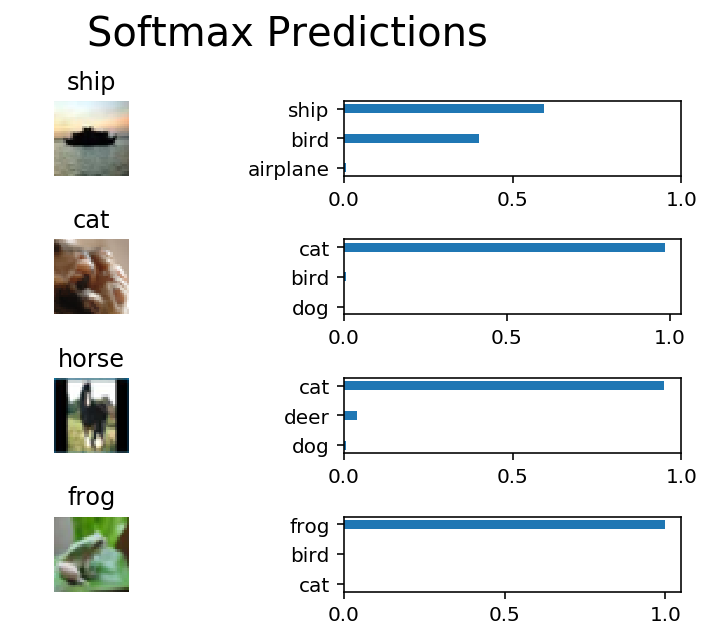

In [21]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import tensorflow as tf
import pickle
import helper
import random

# Set batch size if not already set
try:
    if batch_size:
        pass
except NameError:
    batch_size = 64

save_model_path = './image_classification'
n_samples = 4
top_n_predictions = 3

def test_model():
    """
    Test the saved model against the test dataset
    """

    test_features, test_labels = pickle.load(open('preprocess_training.p', mode='rb'))
    loaded_graph = tf.Graph()

    with tf.Session(graph=loaded_graph) as sess:
        # Load model
        loader = tf.train.import_meta_graph(save_model_path + '.meta')
        loader.restore(sess, save_model_path)

        # Get Tensors from loaded model
        loaded_x = loaded_graph.get_tensor_by_name('x:0')
        loaded_y = loaded_graph.get_tensor_by_name('y:0')
        loaded_keep_prob = loaded_graph.get_tensor_by_name('keep_prob:0')
        loaded_logits = loaded_graph.get_tensor_by_name('logits:0')
        loaded_acc = loaded_graph.get_tensor_by_name('accuracy:0')
        
        # Get accuracy in batches for memory limitations
        test_batch_acc_total = 0
        test_batch_count = 0
        
        for train_feature_batch, train_label_batch in helper.batch_features_labels(test_features, test_labels, batch_size):
            test_batch_acc_total += sess.run(
                loaded_acc,
                feed_dict={loaded_x: train_feature_batch, loaded_y: train_label_batch, loaded_keep_prob: 1.0})
            test_batch_count += 1

        print('Testing Accuracy: {}\n'.format(test_batch_acc_total/test_batch_count))

        # Print Random Samples
        random_test_features, random_test_labels = tuple(zip(*random.sample(list(zip(test_features, test_labels)), n_samples)))
        random_test_predictions = sess.run(
            tf.nn.top_k(tf.nn.softmax(loaded_logits), top_n_predictions),
            feed_dict={loaded_x: random_test_features, loaded_y: random_test_labels, loaded_keep_prob: 1.0})
        helper.display_image_predictions(random_test_features, random_test_labels, random_test_predictions)


test_model()

## Why 50-70% Accuracy?
You might be wondering why you can't get an accuracy any higher. First things first, 50% isn't bad for a simple CNN.  Pure guessing would get you 10% accuracy. However, you might notice people are getting scores [well above 70%](http://rodrigob.github.io/are_we_there_yet/build/classification_datasets_results.html#43494641522d3130).  That's because we haven't taught you all there is to know about neural networks. We still need to cover a few more techniques.
## Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook.  Save the notebook file as "dlnd_image_classification.ipynb" and save it as a HTML file under "File" -> "Download as".  Include the "helper.py" and "problem_unittests.py" files in your submission.